<a href="https://colab.research.google.com/github/indefinite-ar/Pythonist/blob/main/Attention_LSTM_Andrew_ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 . In this step, we will import all the necessary datasets used for the modelling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Fluktuasi Harga Nikel dari 2015 - 2023')

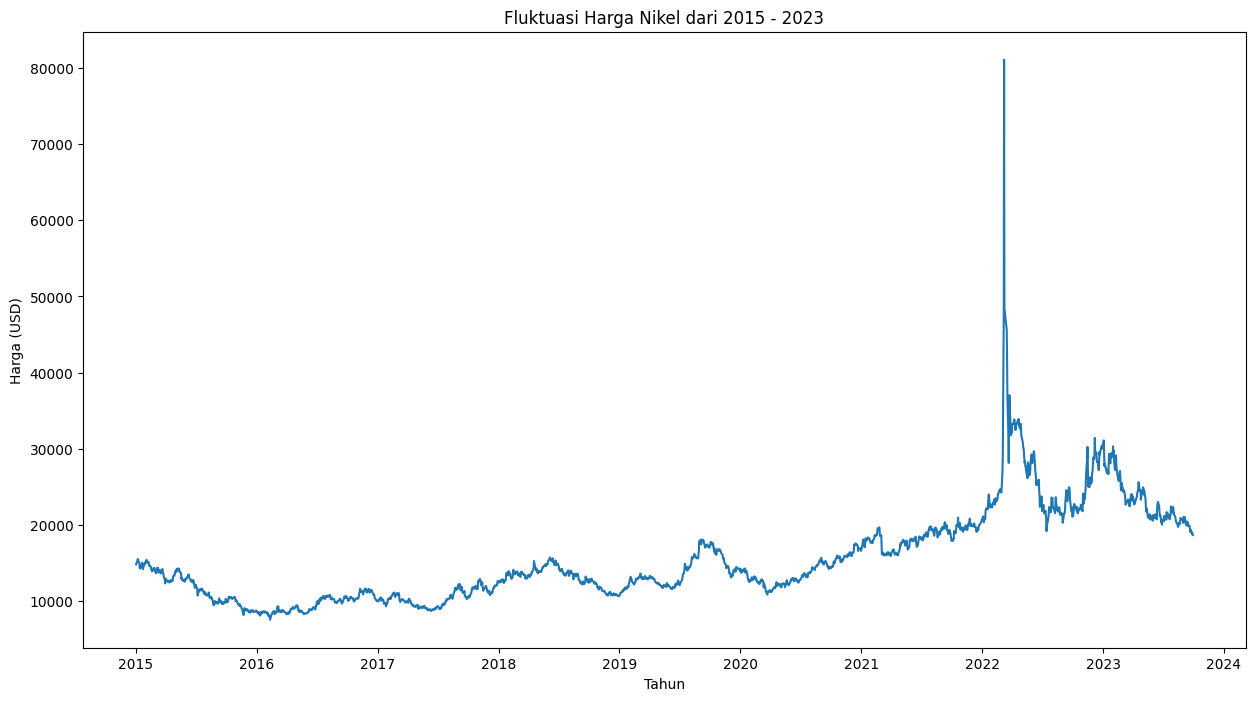

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Code Datasets/NickelDatasets_New.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
price=data['Price']
date=data['Date']
plt.figure(figsize=(15,8))
plt.plot(date,price)
plt.xlabel("Tahun")
plt.ylabel("Harga (USD)")
plt.title("Fluktuasi Harga Nikel dari 2015 - 2023")

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 86.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from dataprep.eda import create_report
create_report(data)

Computing series-max-agg-25ea11fff74c978f61b520b84b4e647e:   0%|          | 0/280 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dataprep/eda/utils.py:326: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  dfr = drop_null(df).groupby(grouper).size().reset_index()
/usr/local/lib/python3.10/dist-packages/dataprep/eda/utils.py:326: FutureWarning: TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.
  dfr = drop_null(df).groupby(grouper).size().reset_index()
/usr/local/lib/python3.10/dist-packages/dataprep/eda/utils.py:326: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  dfr = drop_null(df).groupby(grouper).size().reset_index()
/usr/local/lib/python3.10/dist-packages/dataprep/eda/utils.py:326: FutureWarning: TimeGrouper.obj is deprecated and will be removed in a future version. Use GroupBy.indexer instead

ValueError: too many values to unpack (expected 2)

In [5]:
data.head()

,Date,Price
0,2015-01-02,14852.0
1,2015-01-05,15125.0
2,2015-01-06,15256.0
3,2015-01-07,15531.0
4,2015-01-08,15540.0


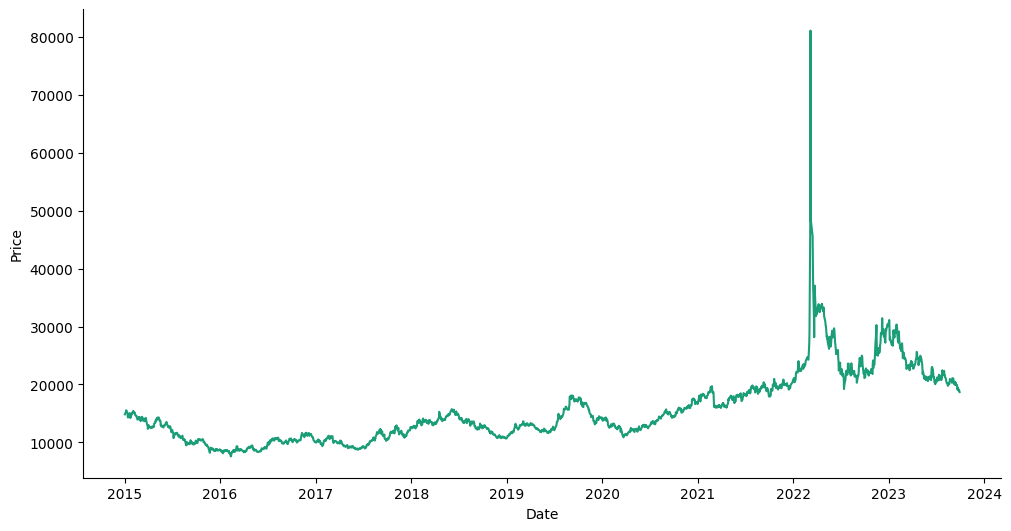

In [6]:
# @title Date vs Price

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

Dibawah ini adalah kode yang berhasil diterapkan untuk membuat model LSTM UniDirectional yang bisa dipakai untuk memprediksi harga nikel.

Jangan dirusak.

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
df=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Code Datasets/NickelDatasets_New.xlsx')

# Assuming your Date column is not the index yet
df['Date'] = pd.to_datetime(df['Date'])
df=df[df['Price']<=40000]

# Create lag columns
num_lags = 5
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['Price'].shift(i)

# Drop NaN values that might be created due to the lag
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
split_index = int(0.8 * len(df))
print("Total length of DataFrame:", len(df))
print("Split index:", split_index)
df_train = df.iloc[:split_index]
df_val=df.iloc[split_index:]
print("Length of df_train:", len(df_train))
print("Length of df_val:", len(df_val))

#Pick datasets
cols=list(df_train)[2:7]
df_train=df_train[cols].astype(float)
df_val=df_val[cols].astype(float)
#df_train.plot.line()

#Rescale the datasets
scaler=StandardScaler(with_mean=False)
scaler1=scaler.fit(df_train)
#scaler1=scaler.fit(df_val)
scaled_train=scaler1.transform(df_train)
scaled_val=scaler1.transform(df_val)

#Define timesteps and sequence for training datasets
trainX=[]
trainY=[]

n_future=1
n_past=35

for i in range(n_past,len(scaled_train)-n_future+1):
  trainX.append(scaled_train[i-n_past:i,:])
  trainY.append(scaled_train[i+n_future-1:i+n_future,0])
trainX,trainY=np.array(trainX),np.array(trainY)
print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

# Remove samples with NaN values
trainX = trainX[~np.isnan(trainX).any(axis=(1, 2))]
trainY = trainY[~np.isnan(trainY)]

#Create datasets for validation
valX=[]
valY=[]

for i in range (n_past,len(scaled_val)- n_future+1):
  valX.append(scaled_val[i-n_past:i,:])
  valY.append(scaled_val[i+n_future-1:i+n_future,0])
valX,valY=np.array(valX),np.array(valY)
print('valX shape=={}.'.format(valX.shape))
print('valY shape=={}.'.format(valY.shape))

#Remove validation samples with NaN
nan_rows=np.any(np.isnan(valX.reshape(valX.shape[0],-1)),axis=1)
valX=valX[~nan_rows]
valY=valY[~nan_rows]

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = K.clip(y_true, K.epsilon(), None), K.clip(y_pred, K.epsilon(), None)
    mape = K.mean(K.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Compile your model using MAPE as a metric
optimizer=Adam(learning_rate=0.002)

#Create models
model=Sequential()
model.add(LSTM(300,activation='tanh',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(50,activation='tanh',return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='linear'))
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics='mape')
model.summary()

#Hope this work
prediction=model.fit(trainX,trainY,epochs=20,batch_size=100, validation_data=(valX,valY), verbose=2)

#Evaluate
val_loss,val_mape=model.evaluate(valX,valY)
print(f'Validation Loss : {val_loss}, Validation MAPE : {val_mape}')

Total length of DataFrame: 2196
Split index: 1756
Length of df_train: 1756
Length of df_val: 440
trainX shape ==(1721, 35, 5).
trainY shape ==(1721, 1).
valX shape==(405, 35, 5).
valY shape==(405, 1).
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_68 (LSTM)              (None, 35, 300)           367200    
                                                                 
 lstm_69 (LSTM)              (None, 50)                70200     
                                                                 
 batch_normalization_34 (Ba  (None, 50)                200       
 tchNormalization)                                               
                                                                 
 dropout_34 (Dropout)        (None, 50)                0         
                                                                 
 dense_34 (Dense)            (None, 1)            

Dibawah ini adalah kode yang berhasil diterapkan untuk membuat model LSTM BiDirectional yang bisa dipakai untuk memprediksi harga nikel.

Jangan dirusak.

In [14]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout, Bidirectional
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# Load your dataset
df=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Code Datasets/NickelDatasets_New.xlsx')

# Assuming your Date column is not the index yet
df['Date'] = pd.to_datetime(df['Date'])
df=df[df['Price']<=40000]

# Create lag columns
num_lags = 5
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['Price'].shift(i)

# Drop NaN values that might be created due to the lag
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
split_index = int(0.8 * len(df))
print("Total length of DataFrame:", len(df))
print("Split index:", split_index)
df_train = df.iloc[:split_index]
df_val=df.iloc[split_index:]
print("Length of df_train:", len(df_train))
print("Length of df_val:", len(df_val))

#Pick datasets
cols=list(df_train)[2:7]
df_train=df_train[cols].astype(float)
df_val=df_val[cols].astype(float)
#df_train.plot.line()

#Rescale the datasets
scaler=StandardScaler(with_mean=False)
scaler1=scaler.fit(df_train)
#scaler1=scaler.fit(df_val)
scaled_train=scaler1.transform(df_train)
scaled_val=scaler1.transform(df_val)

#Define timesteps and sequence for training datasets
trainX=[]
trainY=[]

n_future=1
n_past=25

for i in range(n_past,len(scaled_train)-n_future+1):
  trainX.append(scaled_train[i-n_past:i,:])
  trainY.append(scaled_train[i+n_future-1:i+n_future,0])
trainX,trainY=np.array(trainX),np.array(trainY)
print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

# Remove samples with NaN values
trainX = trainX[~np.isnan(trainX).any(axis=(1, 2))]
trainY = trainY[~np.isnan(trainY)]

#Create datasets for validation
valX=[]
valY=[]

for i in range (n_past,len(scaled_val)- n_future+1):
  valX.append(scaled_val[i-n_past:i,:])
  valY.append(scaled_val[i+n_future-1:i+n_future,0])
valX,valY=np.array(valX),np.array(valY)
print('valX shape=={}.'.format(valX.shape))
print('valY shape=={}.'.format(valY.shape))

#Remove validation samples with NaN
nan_rows=np.any(np.isnan(valX.reshape(valX.shape[0],-1)),axis=1)
valX=valX[~nan_rows]
valY=valY[~nan_rows]

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = K.clip(y_true, K.epsilon(), None), K.clip(y_pred, K.epsilon(), None)
    mape = K.mean(K.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Compile your model using MAPE as a metric
optimizer=Adam(learning_rate=0.002)

#Create models
model=Sequential()
model.add(Bidirectional(LSTM(100,activation='tanh',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)))
model.add(Bidirectional(LSTM(50,activation='tanh',return_sequences=False)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear', kernel_regularizer=l1(0.01)))
model.build((None,trainX.shape[1],trainX.shape[2]))
model.compile(optimizer=optimizer,loss='mean_squared_error',metrics='mape')
model.summary()

#Hope this work
prediction=model.fit(trainX,trainY,epochs=20,batch_size=20, validation_data=(valX,valY), verbose=2)

#Evaluate
val_loss,val_mape=model.evaluate(valX,valY)
print(f'Validation Loss : {val_loss}, Validation MAPE : {val_mape}')

Total length of DataFrame: 2196
Split index: 1756
Length of df_train: 1756
Length of df_val: 440
trainX shape ==(1731, 25, 5).
trainY shape ==(1731, 1).
valX shape==(415, 25, 5).
valY shape==(415, 1).
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirect  (None, 25, 200)           84800     
 ional)                                                          
                                                                 
 bidirectional_15 (Bidirect  (None, 100)               100400    
 ional)                                                          
                                                                 
 batch_normalization_7 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 100)           

Dibawah ini adalah model bidirectional LSTM yang dimodifikasi dengan attention layer

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense,Dropout, Bidirectional, Layer, Input, Concatenate
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Attention
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
df=pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Code Datasets/NickelDatasets_New.xlsx')

# Assuming your Date column is not the index yet
df['Date'] = pd.to_datetime(df['Date'])
df=df[df['Price']<=40000]

# Create lag columns
num_lags = 5
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['Price'].shift(i)

# Drop NaN values that might be created due to the lag
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()
split_index = int(0.8 * len(df))
print("Total length of DataFrame:", len(df))
print("Split index:", split_index)
df_train = df.iloc[:split_index]
df_val=df.iloc[split_index:]
print("Length of df_train:", len(df_train))
print("Length of df_val:", len(df_val))

#Pick datasets
cols=list(df_train)[1:7]
df_train=df_train[cols].astype(float)
df_val=df_val[cols].astype(float)
#df_train.plot.line()

#Rescale the datasets
#scaler=MinMaxScaler()
scaler=StandardScaler(with_mean=False)
scaler1=scaler.fit(df_train)
#scaler1=scaler.fit(df_val)
scaled_train=scaler1.transform(df_train)
scaled_val=scaler1.transform(df_val)

#Define timesteps and sequence for training datasets
trainX=[]
trainY=[]

n_future=1
n_past=20

for i in range(n_past,len(scaled_train)-n_future+1):
  trainX.append(scaled_train[i-n_past:i,:])
  trainY.append(scaled_train[i+n_future-1:i+n_future,0])
trainX,trainY=np.array(trainX),np.array(trainY)
print('trainX shape =={}.'.format(trainX.shape))
print('trainY shape =={}.'.format(trainY.shape))

# Remove samples with NaN values
trainX = trainX[~np.isnan(trainX).any(axis=(1, 2))]
trainY = trainY[~np.isnan(trainY)]

#Create datasets for validation
valX=[]
valY=[]

for i in range (n_past,len(scaled_val)- n_future+1):
  valX.append(scaled_val[i-n_past:i,:])
  valY.append(scaled_val[i+n_future-1:i+n_future,0])
valX,valY=np.array(valX),np.array(valY)
print('valX shape=={}.'.format(valX.shape))
print('valY shape=={}.'.format(valY.shape))

#Remove validation samples with NaN
nan_rows=np.any(np.isnan(valX.reshape(valX.shape[0],-1)),axis=1)
valX=valX[~nan_rows]
valY=valY[~nan_rows]

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = K.clip(y_true, K.epsilon(), None), K.clip(y_pred, K.epsilon(), None)
    mape = K.mean(K.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Compile your model using MAPE as a metric
optimizer=Adam(learning_rate=0.002)

# Custom layer to extract the output of the Bidirectional LSTM layer
class OutputExtractorLayer(Layer):
    def __init__(self, **kwargs):
        super(OutputExtractorLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs

# Create models using the functional API
input_layer = Input(shape=(trainX.shape[1], trainX.shape[2]))

# Bidirectional LSTM layer
bidirectional_lstm_layer = Bidirectional(LSTM(100, activation='tanh', return_sequences=True))(input_layer)

# Attention layer with additive scoring
attention_layer = Attention(use_scale=True, score_mode='dot')([bidirectional_lstm_layer, bidirectional_lstm_layer])

# Bidirectional LSTM layer with return_sequences
bidirectional_lstm_output = Bidirectional(LSTM(50, activation='tanh', return_sequences=False))(attention_layer)

# Additional layers (BatchNormalization, Dropout, Dense)
batch_norm_layer = BatchNormalization()(bidirectional_lstm_output)
dropout_layer = Dropout(0.3)(batch_norm_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

# Create the model
model_at = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model_at.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])
model_at.summary()

#Hope this work
prediction=model_at.fit(trainX,trainY,epochs=30,batch_size=50, validation_data=(valX,valY), verbose=2)

#Evaluate
val_loss,val_mape=model_at.evaluate(valX,valY)
print(f'Validation Loss : {val_loss}, Validation MAPE : {val_mape}')

Total length of DataFrame: 2196
Split index: 1756
Length of df_train: 1756
Length of df_val: 440
trainX shape ==(1736, 20, 6).
trainY shape ==(1736, 1).
valX shape==(420, 20, 6).
valY shape==(420, 1).
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 20, 6)]              0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 20, 200)              85600     ['input_1[0][0]']             
 al)                                                                                              
                                                                                                  
 attention (Attention)       (None, 20, 200)              1         ['bidirectional[0][0]',

14/14 [==============================] - 0s 15ms/step
Length of actual_prices: 420
Length of predicted_prices: 420


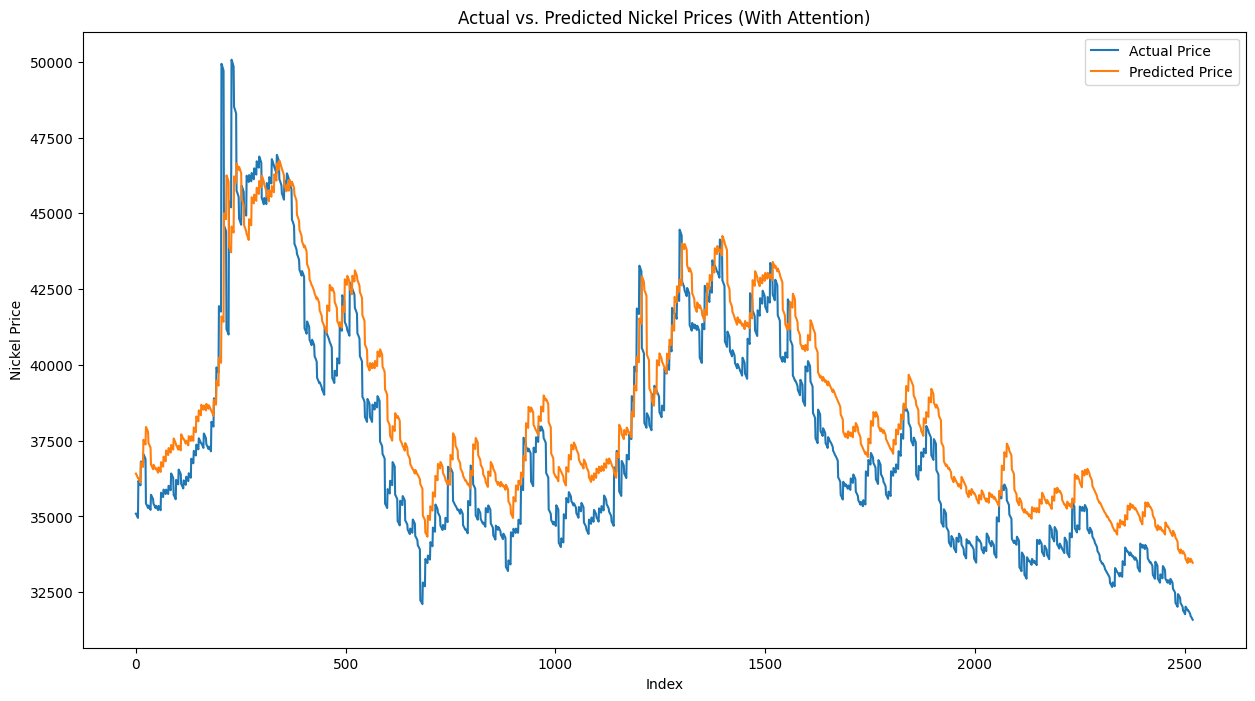

In [ ]:
# Make predictions on the validation dataset
predictions = model_at.predict(valX)

# Manually inverse transform the scaled predictions and actual values to get the original prices
predicted_prices = predictions * scaler1.scale_ + scaler1.mean_
actual_prices = np.mean(valY,axis=1).reshape(-1, 1) * scaler1.scale_ + scaler1.mean_

# Print lengths for debugging
print("Length of actual_prices:", len(actual_prices))
print("Length of predicted_prices:", len(predicted_prices))

# Align lengths of arrays
length = min(len(actual_prices), len(predicted_prices))
actual_prices = actual_prices[:length]
predicted_prices = predicted_prices[:length]

# Create a DataFrame for visualization with plain index
result_df = pd.DataFrame({'Actual_Price': actual_prices.flatten(), 'Predicted_Price': predicted_prices.flatten()})
result_df.index = result_df.index[-len(result_df):]  # Use plain index with correct length

# Plotting the actual vs. predicted prices
plt.figure(figsize=(15, 8))
plt.plot(result_df.index, result_df['Actual_Price'], label='Actual Price')
plt.plot(result_df.index, result_df['Predicted_Price'], label='Predicted Price')
plt.title('Actual vs. Predicted Nickel Prices (With Attention)')
plt.xlabel('Index')
plt.ylabel('Nickel Price')
plt.legend()
plt.show()

In [ ]:
df_val.head()

,Price,lag_1,lag_2,lag_3,lag_4,lag_5
1761,19624.0,19116.0,19485.0,19711.0,19746.0,19875.0
1762,19648.0,19624.0,19116.0,19485.0,19711.0,19746.0
1763,19340.0,19648.0,19624.0,19116.0,19485.0,19711.0
1764,19615.0,19340.0,19648.0,19624.0,19116.0,19485.0
1765,19951.0,19615.0,19340.0,19648.0,19624.0,19116.0


In [ ]:
#Pick datasets
date_dex=list(df_val)[0]

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.preprocessing import StandardScaler
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

# Load your dataset
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Code Datasets/NickelDatasets_New.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Price'] <= 40000]

# Create lag columns
num_lags = 5
for i in range(1, num_lags + 1):
    df[f'lag_{i}'] = df['Price'].shift(i)

# Drop NaN values due to lag
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Select relevant columns
cols = list(df.columns[2:7])
df_train = df[cols].astype(float)

# Standardize the datasets
scaler = StandardScaler(with_mean=False)
scaler.fit(df_train)
scaled_train = scaler.transform(df_train)

# Define timesteps and sequence for training datasets
n_future = 1
n_past = 35

trainX, trainY = [], []
for i in range(n_past, len(scaled_train) - n_future + 1):
    trainX.append(scaled_train[i - n_past:i, :])
    trainY.append(scaled_train[i + n_future - 1:i + n_future, 0])
trainX, trainY = np.array(trainX), np.array(trainY)

# Remove samples with NaN values
trainX = trainX[~np.isnan(trainX).any(axis=(1, 2))]
trainY = trainY[~np.isnan(trainY)]

# Define MAPE metric
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = K.clip(y_true, K.epsilon(), None), K.clip(y_pred, K.epsilon(), None)
    mape = K.mean(K.abs((y_true - y_pred) / y_true)) * 100
    return mape

# Define hyperparameters
lstm_units_list = [100, 200, 300]
activation_functions = ['relu', 'tanh']
batch_sizes = [20, 50]
epochs = 20
l1_lambda = 0.001  # L1 regularization strength

# Loop through combinations
for lstm_units in lstm_units_list:
    for activation_func in activation_functions:
        for batch_size in batch_sizes:
            print(f"Training model: LSTM units={lstm_units}, Activation={activation_func}, Batch size={batch_size}")
            model = Sequential()
            model.add(LSTM(lstm_units, activation=activation_func, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True, kernel_regularizer=l1(l1_lambda)))
            model.add(LSTM(lstm_units // 2, activation=activation_func, return_sequences=False, kernel_regularizer=l1(l1_lambda)))
            model.add(Dense(1, activation='linear'))
            model.build((None, trainX.shape[1], trainX.shape[2]))  # Build the model
            model.compile(optimizer=Adam(learning_rate=0.002), loss='mean_squared_error', metrics=[mean_absolute_percentage_error])

            # Train the model
            history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

            # Get training and validation metrics
            train_loss = history.history['loss'][-1]
            val_loss = history.history['val_loss'][-1]
            train_mape = history.history['mean_absolute_percentage_error'][-1]
            val_mape = history.history['val_mean_absolute_percentage_error'][-1]

            print(f"Train Loss: {train_loss:.4f}, Train MAPE: {train_mape:.2f}%")
            print(f"Validation Loss: {val_loss:.4f}, Validation MAPE: {val_mape:.2f}%")
            print("\n")


Training model: LSTM units=100, Activation=relu, Batch size=20
Epoch 1/20
87/87 [==============================] - 9s 69ms/step - loss: 1.1823 - mean_absolute_percentage_error: 11.1022 - val_loss: 0.7551 - val_mean_absolute_percentage_error: 8.1117
Epoch 2/20
87/87 [==============================] - 6s 64ms/step - loss: 0.4361 - mean_absolute_percentage_error: 4.0742 - val_loss: 0.5390 - val_mean_absolute_percentage_error: 6.4481
Epoch 3/20
87/87 [==============================] - 6s 63ms/step - loss: 0.3466 - mean_absolute_percentage_error: 3.8253 - val_loss: 0.5356 - val_mean_absolute_percentage_error: 7.0601
Epoch 4/20
87/87 [==============================] - 6s 64ms/step - loss: 0.2913 - mean_absolute_percentage_error: 3.6710 - val_loss: 0.3964 - val_mean_absolute_percentage_error: 5.6292
Epoch 5/20
87/87 [==============================] - 6s 64ms/step - loss: 0.2502 - mean_absolute_percentage_error: 3.4307 - val_loss: 0.3616 - val_mean_absolute_percentage_error: 5.3025
Epoch 6/20


Train Loss: 0.0662, Train MAPE: 2.82%
Validation Loss: 0.1498, Validation MAPE: 4.89%


Training model: LSTM units=100, Activation=relu, Batch size=50
Epoch 1/20
35/35 [==============================] - 5s 76ms/step - loss: 3.3378 - mean_absolute_percentage_error: 37.8558 - val_loss: 2.8194 - val_mean_absolute_percentage_error: 26.2739
Epoch 2/20
35/35 [==============================] - 2s 65ms/step - loss: 0.7608 - mean_absolute_percentage_error: 5.0656 - val_loss: 0.7658 - val_mean_absolute_percentage_error: 5.4537
Epoch 3/20
35/35 [==============================] - 2s 65ms/step - loss: 0.5917 - mean_absolute_percentage_error: 4.0637 - val_loss: 0.7618 - val_mean_absolute_percentage_error: 7.4746
Epoch 4/20
35/35 [==============================] - 2s 67ms/step - loss: 0.5240 - mean_absolute_percentage_error: 3.9303 - val_loss: 0.6590 - val_mean_absolute_percentage_error: 6.1484
Epoch 5/20
35/35 [==============================] - 2s 66ms/step - loss: 0.4771 - mean_absolute_percentage_

Train Loss: 0.0593, Train MAPE: 3.04%
Validation Loss: 0.6537, Validation MAPE: 10.55%


Training model: LSTM units=200, Activation=relu, Batch size=20


Epoch 1/20
87/87 [==============================] - 8s 68ms/step - loss: 1.6060 - mean_absolute_percentage_error: 7.6572 - val_loss: 0.7182 - val_mean_absolute_percentage_error: 6.4906
Epoch 2/20
87/87 [==============================] - 6s 67ms/step - loss: 0.4264 - mean_absolute_percentage_error: 3.5092 - val_loss: 0.4257 - val_mean_absolute_percentage_error: 5.0756
Epoch 3/20
87/87 [==============================] - 6s 64ms/step - loss: 0.2727 - mean_absolute_percentage_error: 3.9834 - val_loss: 0.3237 - val_mean_absolute_percentage_error: 5.7346
Epoch 4/20
87/87 [==============================] - 6s 65ms/step - loss: 0.1878 - mean_absolute_percentage_error: 3.4923 - val_loss: 0.2381 - val_mean_absolute_percentage_error: 4.7397
Epoch 5/20
87/87 [==============================] - 6s 64ms/step - loss: 0.1414 - mean_absolute_percentage_error: 3.7465 - val_loss: 0.1963 - val_mean_absolute_percentage_error: 4.6169
Epoch 6/20
87/87 [==============================] - 6s 66ms/step - loss: 0.

Train Loss: 0.0393, Train MAPE: 3.39%
Validation Loss: 0.0874, Validation MAPE: 3.51%


Training model: LSTM units=200, Activation=relu, Batch size=50
Epoch 1/20
35/35 [==============================] - 5s 75ms/step - loss: 3.0382 - mean_absolute_percentage_error: 14.8047 - val_loss: 1.5010 - val_mean_absolute_percentage_error: 4.8638
Epoch 2/20
35/35 [==============================] - 2s 66ms/step - loss: 1.0277 - mean_absolute_percentage_error: 3.8341 - val_loss: 0.9061 - val_mean_absolute_percentage_error: 5.0087
Epoch 3/20
35/35 [==============================] - 2s 68ms/step - loss: 0.6998 - mean_absolute_percentage_error: 3.4730 - val_loss: 0.7153 - val_mean_absolute_percentage_error: 5.3111
Epoch 4/20
35/35 [==============================] - 2s 66ms/step - loss: 0.5546 - mean_absolute_percentage_error: 3.4322 - val_loss: 0.6184 - val_mean_absolute_percentage_error: 5.9708
Epoch 5/20
35/35 [==============================] - 2s 65ms/step - loss: 0.4602 - mean_absolute_percentage_e

Epoch 1/20
87/87 [==============================] - 9s 71ms/step - loss: 2.2740 - mean_absolute_percentage_error: 6.4333 - val_loss: 0.8244 - val_mean_absolute_percentage_error: 8.6529
Epoch 2/20
87/87 [==============================] - 6s 65ms/step - loss: 0.4073 - mean_absolute_percentage_error: 3.8257 - val_loss: 0.3691 - val_mean_absolute_percentage_error: 4.9496
Epoch 3/20
87/87 [==============================] - 6s 67ms/step - loss: 0.2212 - mean_absolute_percentage_error: 4.3977 - val_loss: 0.2492 - val_mean_absolute_percentage_error: 4.8057
Epoch 4/20
87/87 [==============================] - 6s 65ms/step - loss: 0.1447 - mean_absolute_percentage_error: 3.8407 - val_loss: 0.2171 - val_mean_absolute_percentage_error: 4.9276
Epoch 5/20
87/87 [==============================] - 6s 68ms/step - loss: 0.1118 - mean_absolute_percentage_error: 3.8434 - val_loss: 0.2120 - val_mean_absolute_percentage_error: 5.9634
Epoch 6/20
87/87 [==============================] - 6s 65ms/step - loss: 0.

Train Loss: 0.0573, Train MAPE: 2.84%
Validation Loss: 0.1105, Validation MAPE: 4.04%


Training model: LSTM units=300, Activation=relu, Batch size=50
Epoch 1/20
35/35 [==============================] - 5s 76ms/step - loss: 17.0452 - mean_absolute_percentage_error: 79.2611 - val_loss: 18.7981 - val_mean_absolute_percentage_error: 74.7390
Epoch 2/20
35/35 [==============================] - 2s 66ms/step - loss: 17.6267 - mean_absolute_percentage_error: 80.2543 - val_loss: 522.6558 - val_mean_absolute_percentage_error: 116.0413
Epoch 3/20
35/35 [==============================] - 2s 66ms/step - loss: 4.9721 - mean_absolute_percentage_error: 59.5989 - val_loss: 4482.6104 - val_mean_absolute_percentage_error: 92.7366
Epoch 4/20
35/35 [==============================] - 2s 69ms/step - loss: 2.1354 - mean_absolute_percentage_error: 5.5892 - val_loss: 2.1887 - val_mean_absolute_percentage_error: 5.6719
Epoch 5/20
35/35 [==============================] - 2s 66ms/step - loss: 1.9689 - mean_absolut